# **UNDERSTANDING K-NEAREST NEIGHTBORS (K-NN)**
The KNN is an supervised machine learning algorithm used either for classification and regression.It focused on distance from new unclassified/unlabeled data points to existing classified/labeled data points. It relies on labeled input data to learn a function that produces an appropriate output when given new unlabeled data.


## **The math behind**
The algorithm calculares the distance from the new data point to each existing data point, but how that distance is measured? There are three methods to do so:
- Mikowski Distance
- Euclidean Distance
- Manhattan Distance


## **Best cases to use KNN**
KNN is actually one of the most used algorithms, since it makes highly accurate predictions. It is widely used to solve regression, classification, or search problems, and it's relatively easy to find examples of the knn applications like in [healthcare](https://assets.researchsquare.com/files/rs-70985/v2_stamped.pdf), [recommendation systems](https://mktg.best/a1t-9), or [forecasting epidemics](http://ijseas.com/volume1/v1i7/ijseas20150712.pdf).

So summarizing if pretty much, the key features to look for would be:

1. It's appropiate when there is a dataset too small for the task
2. When the data is labeled correctly and the predicted value will be among the given labels.

## **Advantages**
- Easy to implement and therefore, strainghtforward to understand.
- A good value of K will make the model robust to noise
- Almost no assumptions on the data, so it's barely parametrized
- Since the model training is not required, it's easy to adapt the dataset
- Support non linear decision boundary

## **Disadvantages**
- Inefficient with large datasets (distance must be calculated throught every point)
- KNN assumes similar data points are close to each other, so might be sensitive to **outliers**
- Cannot handle umbalanced data, otherwise will be strongly biased
- K value is proportional to the computational expense of the algorithm



In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## **1. Loading Data**
For this example we are going to use the **Iris Dataset** which contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). It can be explored more in detail [here](http://archive.ics.uci.edu/ml/datasets/Iris)
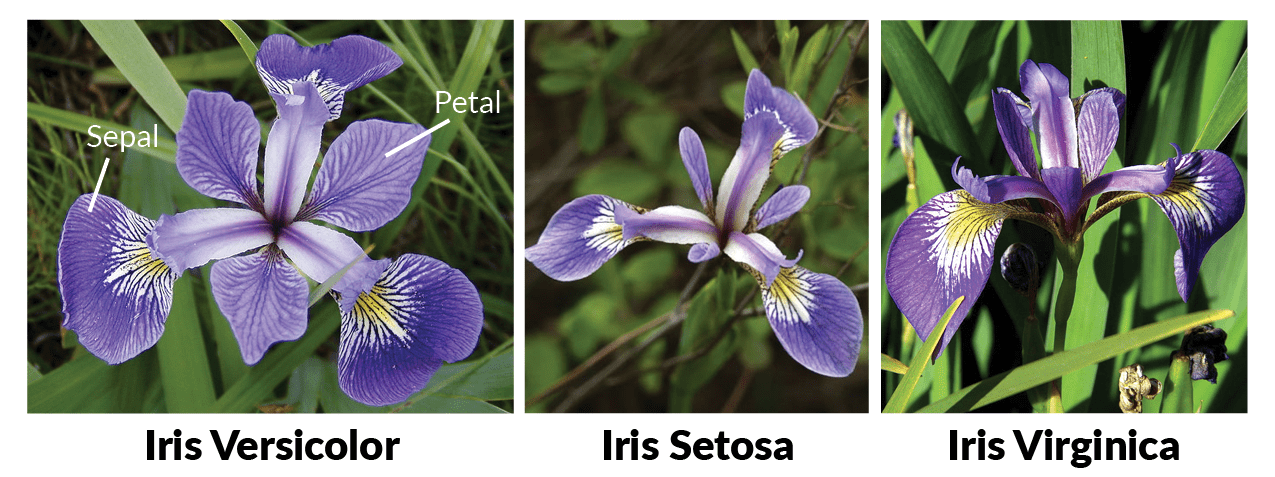

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

## **2. Data Exploration**

In [65]:
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [165]:
df_iris.shape

(150, 5)

In [ ]:
df_iris['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

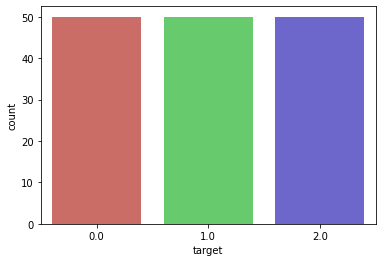

In [ ]:
sb.countplot(x = 'target', data= df_iris, palette='hls')

Our dataset is pretty balanced, which is important to check. Otherwise would be strongly biased

In [ ]:
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

There is not missing values. So far so good, pretty straightforward

In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


### **2.1 Look for outliers**

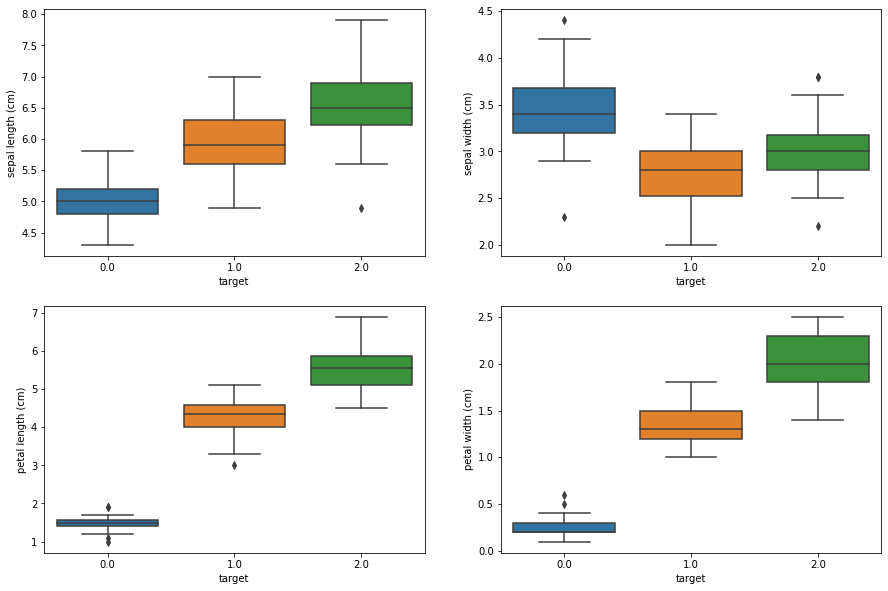

In [66]:

plt.figure(figsize=(15,10))

i = 0
for feature in iris.feature_names:
  i = i+1
  plt.subplot(2,2,i)
  sb.boxplot(x ='target', y =feature, data = df_iris)

plt.show()

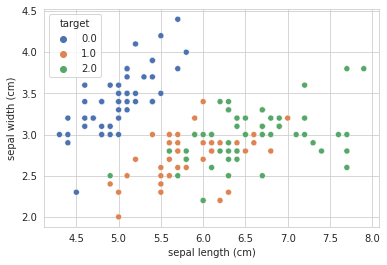

In [170]:
sb.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=df_iris, hue='target', palette="deep")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


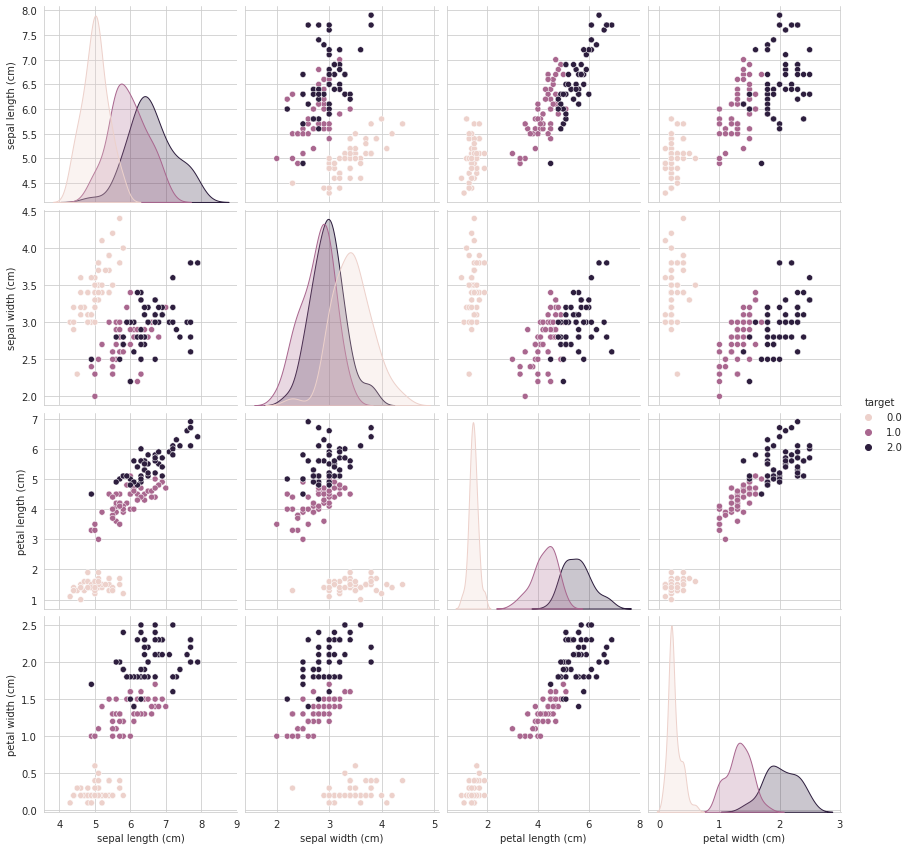

In [168]:
sb.set_style("whitegrid")
sb.pairplot(df_iris, hue="target", size = 3)
plt.show()

## **3. The Model**

In [72]:
X = df_iris[iris.feature_names].values
y = df_iris['target'].values

In [74]:
le = LabelEncoder()
y = le.fit_transform(y)

In [75]:
# Split into training and data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [134]:
# We make an instance of the model and initialize k = 2
classifier = KNeighborsClassifier(n_neighbors= 2)
# Fitting the model
classifier.fit(X_train, y_train)
# Predicting the test result
y_pred = classifier.predict(X_test)

In [140]:
print("It was used as distance metric: {}".format(classifier.effective_metric_))

It was used as distance metric: euclidean


### **3.1 Evaluate & Predict**

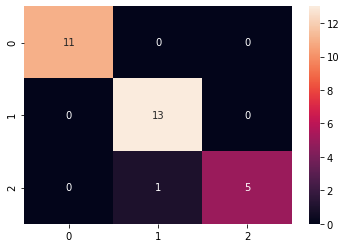

In [135]:
cm = metrics.confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot = True)

In [136]:
accuracy = metrics.accuracy_score(y_test, y_pred)*100
error = metrics.mean_squared_error(y_test, y_pred)*100
print("Evaluation of the model: {}% accuracy and {}% error".format( round(accuracy, 2), round(error, 4) ))

Evaluation of the model: 96.67% accuracy and 3.3333% error


### **3.1 Get a better K value**


In [146]:
k_list = list(range(1,50,2))
k_scores = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors= k)
  scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = 'accuracy')
  k_scores.append(scores.mean())


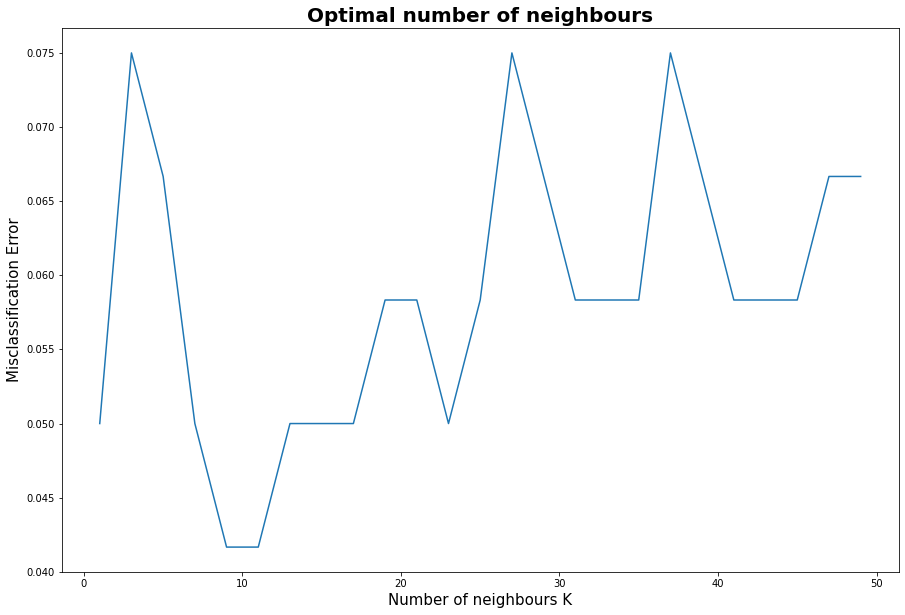

In [149]:
MSE = [1-x for x in k_scores]

plt.figure(figsize=(15,10))
plt.title("Optimal number of neighbours", fontsize = 20, fontweight = 'bold')
plt.xlabel('Number of neighbours K', fontsize = 15)
plt.ylabel('Misclassification Error', fontsize = 15)
plt.plot(k_list, MSE)

plt.show()

In [151]:
print("The minimum value in the MSE plor is: {}".format(min(MSE)))
best_k_value = k_list[MSE.index(min(MSE))]
print("So the best value for K is: {}".format(best_k_value))


The minimum value in the MSE plor is: 0.04166666666666674
So the best value for K is: 9


### **3.1.1 Test the new K value**

Evaluation of the model: 100.0% accuracy and 0.0% error


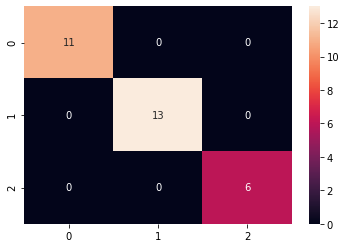

In [152]:
# Training again the classifier with the new value
classifier = KNeighborsClassifier(n_neighbors= best_k_value)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# Confussion Matrix to evaluate the model
cm = metrics.confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot = True)
# Mesure the accuracy and the corresponding error
accuracy = metrics.accuracy_score(y_test, y_pred)*100
error = metrics.mean_squared_error(y_test, y_pred)*100
print("Evaluation of the model: {}% accuracy and {}% error".format( round(accuracy, 2), round(error, 4) ))

In [164]:
# Get the classes name
classes = {}
for i in range(len(iris.target_names)):
  classes[i] = iris.target_names[i]

print(classes)

# Make the prediction 
prediction = classifier.predict(X_test)
print(classes[prediction[0]])

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}
virginica


*RESOURCES:*
* [Basis of KNN](https://pub.towardsai.net/k-nearest-neighbors-knn-algorithm-tutorial-machine-learning-basics-ml-ec6756d3e0ac)
* [EDA in Iris dataset](https://medium.com/analytics-vidhya/exploratory-data-analysis-uni-variate-analysis-of-iris-data-set-690c87a5cd40)
